# Assignment 2 (5 Marks)

Our dataset contains daily worldwide COVID-19 data. It is downloaded from: https://ourworldindata.org/coronavirus-source-data. Please plot the following visualizations. 

Please submit the ipynb file only.

# Question 1
Please plot the number of total cases (on March 1st, 2021) for each country on a world map.

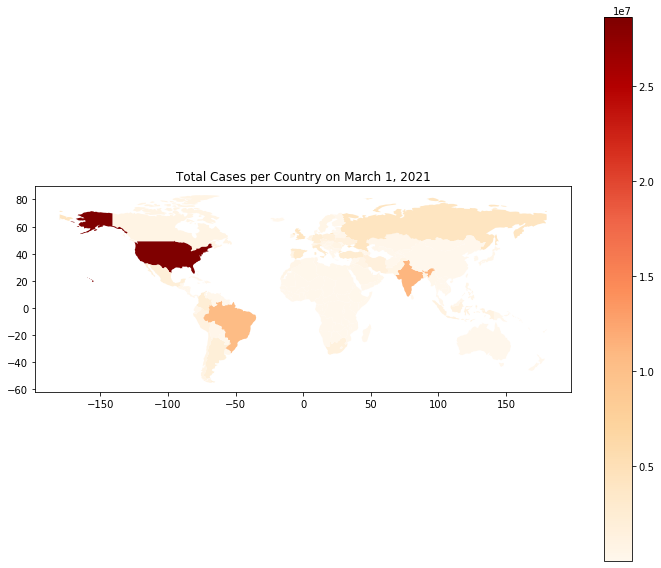

In [252]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv')
temp = df[(df['date'] == "2021-03-01")]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'iso_code', 'gdp_md_est', 'geometry']
world = world.merge(temp,on="iso_code")
world = world.plot(column = "total_cases", figsize=(12,10), legend=True, cmap='OrRd').set_title("Total Cases per Country on March 1, 2021")

# Question 2
Visualize the time series for Canada's daily new cases (2020/01/26-2021/03/09). Smooth the time series using simple moving average with window size 5 (start the smoothing curve from the end of the first window).

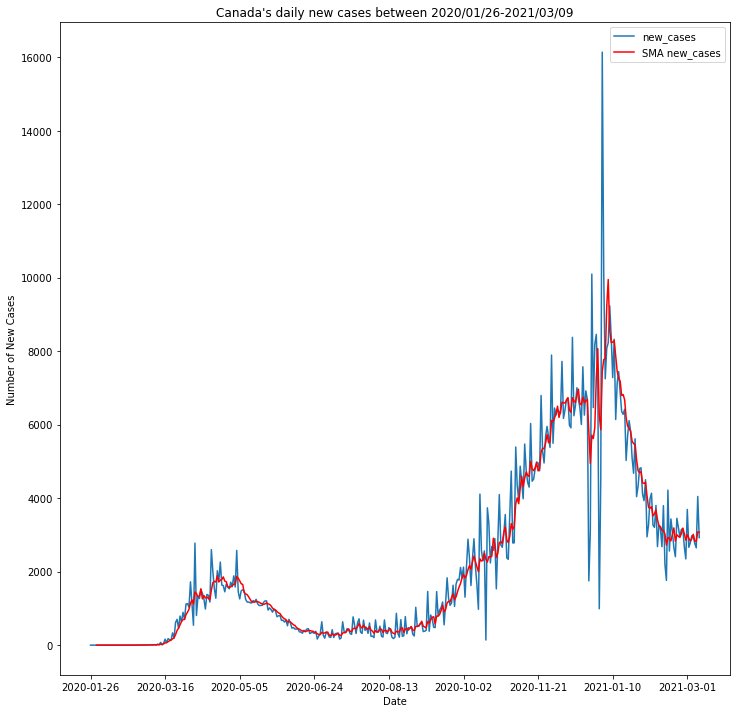

In [253]:
df = pd.read_csv('owid-covid-data.csv')
df.set_index("date", drop = False, inplace = True)
df['date'] = pd.to_datetime(df['date'])
df = df.loc[(df['date'] <= "2021-03-09") & (df['date'] >= "2020-01-26") & (df['iso_code'] == 'CAN')]
temp = df[['location','new_cases']]
SMA = temp['new_cases'].rolling(window=5).mean()
graph = temp.plot(figsize=(12,12)).legend()
graph = SMA.plot(color="red",label="SMA new_cases").legend()
plt.title("Canada's daily new cases between 2020/01/26-2021/03/09")
graph = plt.xlabel('Date')
graph = plt.ylabel('Number of New Cases')